In [ ]:
!pip install ultralytics opencv-python

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 20.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 4.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 97.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 27.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 56.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 5.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 12.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 6.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 85.5 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.5.82
    Uninstalling 

In [ ]:
from ultralytics import YOLO
import cv2
import os
import matplotlib.pyplot as plt
model = YOLO("yolov8n.pt")


Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.


100%|██████████| 6.25M/6.25M [00:00<00:00, 73.9MB/s]


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive



image 1/1 /content/drive/MyDrive/archive (1)/trafficnet_dataset_v1/train/dense_traffic/images_253 (2).jpg: 480x640 13 cars, 2 buss, 3 trucks, 49.5ms
Speed: 14.6ms preprocess, 49.5ms inference, 333.8ms postprocess per image at shape (1, 3, 480, 640)
Image: images_253 (2).jpg, Vehicles detected: 18


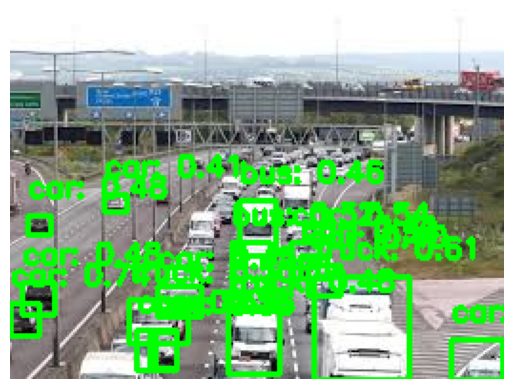


image 1/1 /content/drive/MyDrive/archive (1)/trafficnet_dataset_v1/train/dense_traffic/images_253.jpg: 384x640 30 cars, 1 truck, 52.3ms
Speed: 3.0ms preprocess, 52.3ms inference, 1.9ms postprocess per image at shape (1, 3, 384, 640)
Image: images_253.jpg, Vehicles detected: 31


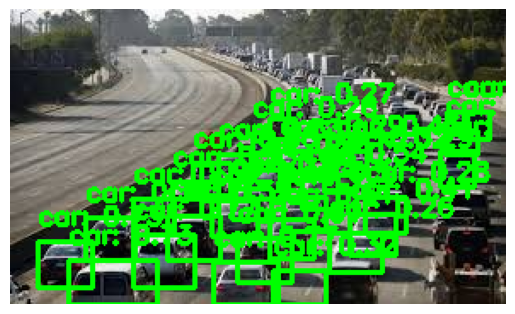


image 1/1 /content/drive/MyDrive/archive (1)/trafficnet_dataset_v1/train/dense_traffic/images_242.jpg: 384x640 5 persons, 13 cars, 3 buss, 12.7ms
Speed: 3.0ms preprocess, 12.7ms inference, 4.3ms postprocess per image at shape (1, 3, 384, 640)
Image: images_242.jpg, Vehicles detected: 16


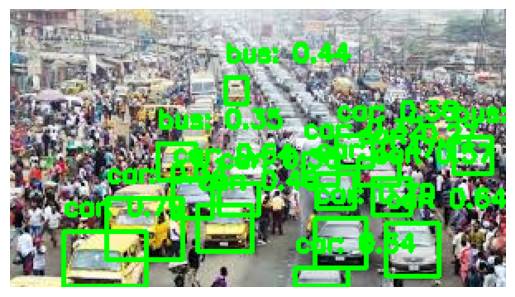


image 1/1 /content/drive/MyDrive/archive (1)/trafficnet_dataset_v1/train/dense_traffic/images_238.jpg: 480x640 10 cars, 7 buss, 3 trucks, 8.7ms
Speed: 2.9ms preprocess, 8.7ms inference, 1.7ms postprocess per image at shape (1, 3, 480, 640)
Image: images_238.jpg, Vehicles detected: 20


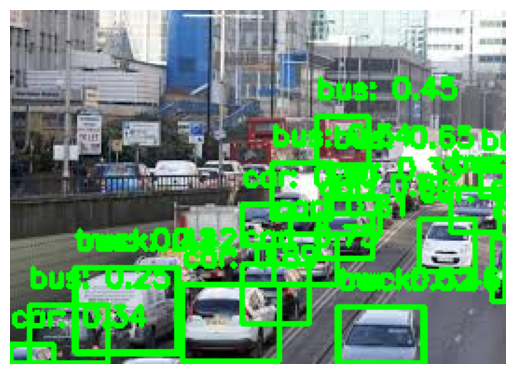


image 1/1 /content/drive/MyDrive/archive (1)/trafficnet_dataset_v1/train/dense_traffic/images_231 (2).jpg: 448x640 1 person, 3 cars, 1 boat, 45.0ms
Speed: 2.1ms preprocess, 45.0ms inference, 1.8ms postprocess per image at shape (1, 3, 448, 640)
Image: images_231 (2).jpg, Vehicles detected: 3


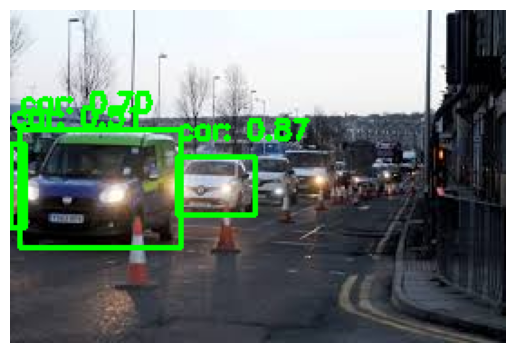


image 1/1 /content/drive/MyDrive/archive (1)/trafficnet_dataset_v1/train/dense_traffic/images_247.jpg: 416x640 25 cars, 4 buss, 45.2ms
Speed: 2.1ms preprocess, 45.2ms inference, 1.8ms postprocess per image at shape (1, 3, 416, 640)
Image: images_247.jpg, Vehicles detected: 29


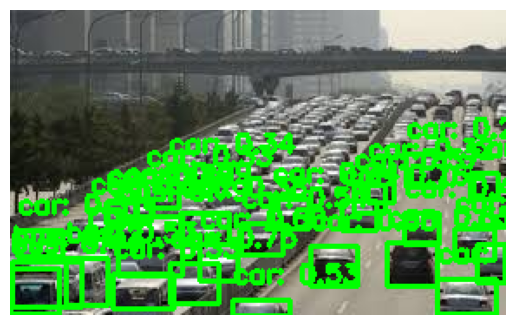

KeyboardInterrupt: 

In [ ]:
import os
import cv2
import torch
import numpy as np
from ultralytics import YOLO
import matplotlib.pyplot as plt

model = YOLO("yolov8n.pt")
DATASET_PATH = "/content/drive/MyDrive/archive (1)/trafficnet_dataset_v1/train"
VEHICLE_CLASSES = {2: "car", 3: "motorcycle", 5: "bus", 7: "truck"}
def preprocess_image(image_path, target_size=(640, 640)):
    image = cv2.imread(image_path)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    image = cv2.resize(image, target_size)
    image = image / 255.0
    return image

def count_vehicles(image_path):
    results = model(image_path)
    vehicle_count = 0

    for result in results:
        for box in result.boxes.data:
            class_id = int(box[5].item())
            if class_id in VEHICLE_CLASSES:
                vehicle_count += 1

    return vehicle_count, results
folders = ["dense_traffic", "dense_traffic"]
for folder in folders:
    folder_path = os.path.join(DATASET_PATH, folder)

    if not os.path.exists(folder_path):
        print(f"Folder not found: {folder_path}")
        continue

    for image_name in os.listdir(folder_path):
        image_path = os.path.join(folder_path, image_name)

        vehicle_count, results = count_vehicles(image_path)
        print(f"Image: {image_name}, Vehicles detected: {vehicle_count}")

        img = cv2.imread(image_path)
        for result in results:
            for box in result.boxes.data:
                x1, y1, x2, y2, conf, cls = box.tolist()
                cls = int(cls)
                if cls in VEHICLE_CLASSES:
                    label = f"{VEHICLE_CLASSES[cls]}: {conf:.2f}"
                    cv2.rectangle(img, (int(x1), int(y1)), (int(x2), int(y2)), (0, 255, 0), 2)
                    cv2.putText(img, label, (int(x1), int(y1) - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 255, 0), 2)

        plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
        plt.axis("off")
        plt.show()


In [ ]:
pip install firebase-admin



image 1/1 /content/drive/MyDrive/archive (1)/trafficnet_dataset_v1/train/dense_traffic/images_253 (2).jpg: 480x640 13 cars, 2 buss, 3 trucks, 9.0ms
Speed: 3.1ms preprocess, 9.0ms inference, 1.8ms postprocess per image at shape (1, 3, 480, 640)
 Image: images_253 (2).jpg | 🚗 Vehicles: 18 | 🚦 Lanes: 5
 Updated Firebase: Vehicles=18, Lanes=5


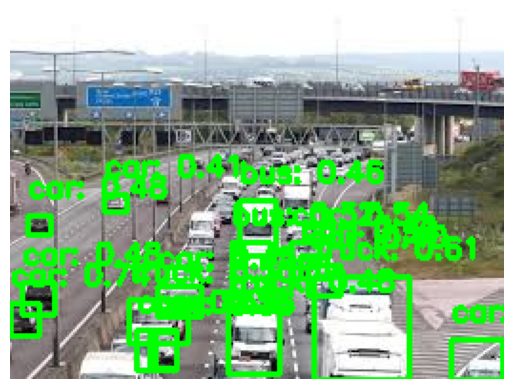


image 1/1 /content/drive/MyDrive/archive (1)/trafficnet_dataset_v1/train/dense_traffic/images_253.jpg: 384x640 30 cars, 1 truck, 12.8ms
Speed: 3.4ms preprocess, 12.8ms inference, 2.0ms postprocess per image at shape (1, 3, 384, 640)
 Image: images_253.jpg | 🚗 Vehicles: 31 | 🚦 Lanes: 5
 Updated Firebase: Vehicles=31, Lanes=5


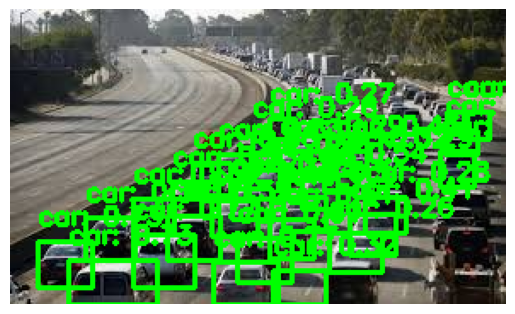


image 1/1 /content/drive/MyDrive/archive (1)/trafficnet_dataset_v1/train/dense_traffic/images_242.jpg: 384x640 5 persons, 13 cars, 3 buss, 16.8ms
Speed: 3.0ms preprocess, 16.8ms inference, 2.1ms postprocess per image at shape (1, 3, 384, 640)
 Image: images_242.jpg | 🚗 Vehicles: 16 | 🚦 Lanes: 5
 Updated Firebase: Vehicles=16, Lanes=5


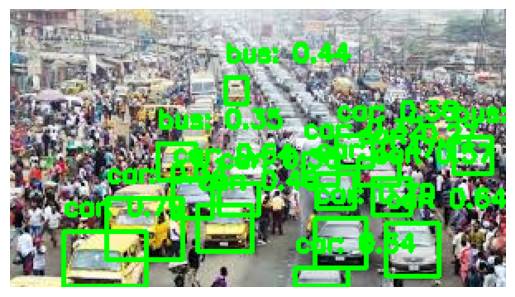

In [ ]:
import os
import cv2
import numpy as np
import firebase_admin
from firebase_admin import credentials, firestore
from ultralytics import YOLO
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

model = YOLO("yolov8n.pt")

if not firebase_admin._apps:
    try:
        cred = credentials.Certificate("/content/traffic-management-f3cd5-firebase-adminsdk-fbsvc-7080c55f84.json")
        firebase_admin.initialize_app(cred)
        db = firestore.client()
    except Exception as e:
        print(f" Firebase Initialization Failed: {e}")

DATASET_PATH = "/content/drive/MyDrive/archive (1)/trafficnet_dataset_v1/train"
VEHICLE_CLASSES = {2: "car", 3: "motorcycle", 5: "bus", 7: "truck"}
def count_vehicles_and_lanes(image_path):
    results = model(image_path)
    vehicle_count = 0
    vehicle_positions = []

    for result in results:
        for box in result.boxes.data:
            class_id = int(box[5].item())
            if class_id in VEHICLE_CLASSES:
                vehicle_count += 1
                x_position = (box[0].item() + box[2].item()) / 2
                vehicle_positions.append([x_position])

    lane_count = 1 if vehicle_positions else 0
    if len(vehicle_positions) > 1:
        kmeans = KMeans(n_clusters=min(5, len(vehicle_positions)), random_state=42, n_init=10)
        kmeans.fit(vehicle_positions)
        lane_count = len(set(kmeans.labels_))

    return vehicle_count, lane_count, results
def update_firebase(vehicle_count, lane_count):
    try:
        doc_ref = db.collection("traffic_data").document("signal1")
        doc_ref.set({
            "vehicle_count": vehicle_count,
            "lane_count": lane_count
        })
        print(f" Updated Firebase: Vehicles={vehicle_count}, Lanes={lane_count}")
    except Exception as e:
        print(f" Firebase Update Failed: {e}")


folders = ["dense_traffic"]
image_counter = 0

for folder in folders:
    folder_path = os.path.join(DATASET_PATH, folder)

    if not os.path.exists(folder_path):
        print(f" Folder not found: {folder_path}")
        continue

    for image_name in os.listdir(folder_path):
        if image_counter >= 3:
            break

        image_path = os.path.join(folder_path, image_name)

        vehicle_count, lane_count, results = count_vehicles_and_lanes(image_path)
        print(f" Image: {image_name} | 🚗 Vehicles: {vehicle_count} | 🚦 Lanes: {lane_count}")

        update_firebase(vehicle_count, lane_count)

        img = cv2.imread(image_path)
        for result in results:
            for box in result.boxes.data:
                x1, y1, x2, y2, conf, cls = box.tolist()
                cls = int(cls)
                if cls in VEHICLE_CLASSES:
                    label = f"{VEHICLE_CLASSES[cls]}: {conf:.2f}"
                    cv2.rectangle(img, (int(x1), int(y1)), (int(x2), int(y2)), (0, 255, 0), 2)
                    cv2.putText(img, label, (int(x1), int(y1) - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 255, 0), 2)

        plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
        plt.axis("off")
        plt.show()

        image_counter += 1


In [ ]:
pip install traci firebase-admin


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 126.4/126.4 kB 3.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 150.9/150.9 kB 7.2 MB/s eta 0:00:00


 Firebase already initialized. Restarting Firebase...
 Firebase initialized successfully!
 Firebase Database Reference Created Successfully!

image 1/1 /content/drive/MyDrive/archive (1)/trafficnet_dataset_v1/train/dense_traffic/images_253 (2).jpg: 480x640 13 cars, 2 buss, 3 trucks, 7.6ms
Speed: 2.2ms preprocess, 7.6ms inference, 3.8ms postprocess per image at shape (1, 3, 480, 640)
 Image: images_253 (2).jpg | 🚗 Vehicles: 18 | 🚦 Lanes: 5
Updated Firebase: Signal=signal1, Vehicles=18, Lanes=5


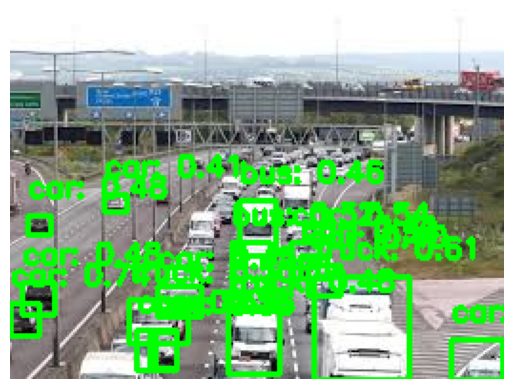

In [ ]:
import os
import cv2
import numpy as np
import firebase_admin
from firebase_admin import credentials, db
from ultralytics import YOLO
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

model = YOLO("yolov8n.pt")

firebase_json_path = "/content/traffic-management-f3cd5-firebase-adminsdk-fbsvc-7080c55f84.json"
database_url = "https://traffic-management-f3cd5-default-rtdb.firebaseio.com/"

if not firebase_admin._apps:
    if os.path.exists(firebase_json_path):
        try:
            cred = credentials.Certificate(firebase_json_path)
            firebase_admin.initialize_app(cred, {'databaseURL': database_url})
            print(" Firebase initialized successfully!")
        except Exception as e:
            print(f" Firebase Initialization Failed: {e}")
    else:
        print(f" Firebase credentials file not found: {firebase_json_path}")

if len(firebase_admin._apps) > 0:
    print(" Firebase already initialized. Restarting Firebase...")
    firebase_admin.delete_app(firebase_admin.get_app())

try:
    cred = credentials.Certificate(firebase_json_path)
    firebase_admin.initialize_app(cred, {'databaseURL': database_url})
    print(" Firebase initialized successfully!")
except Exception as e:
    print(f" Firebase Initialization Failed: {e}")

try:
    traffic_ref = db.reference("traffic_data")
    print(" Firebase Database Reference Created Successfully!")
except Exception as e:
    print(f" Error creating database reference: {e}")
    traffic_ref = None
DATASET_PATH = "/content/drive/MyDrive/archive (1)/trafficnet_dataset_v1/train"
VEHICLE_CLASSES = {2: "car", 3: "motorcycle", 5: "bus", 7: "truck"}

def count_vehicles_and_lanes(image_path):
    results = model(image_path)
    vehicle_count = 0
    vehicle_positions = []

    for result in results:
        for box in result.boxes.data:
            class_id = int(box[5].item())
            if class_id in VEHICLE_CLASSES:
                vehicle_count += 1
                x_position = (box[0].item() + box[2].item()) / 2
                vehicle_positions.append([x_position])

    lane_count = 1 if vehicle_positions else 0
    if len(vehicle_positions) > 1:
        kmeans = KMeans(n_clusters=min(5, len(vehicle_positions)), random_state=42, n_init=10)
        kmeans.fit(vehicle_positions)
        lane_count = len(set(kmeans.labels_))

    return vehicle_count, lane_count, results

def update_firebase(signal_id, vehicle_count, lane_count):
    if traffic_ref is None:
        print(" Firebase not initialized. Skipping update.")
        return

    try:
        traffic_ref.child(signal_id).update({
            "vehicle_count": vehicle_count,
            "lane_count": lane_count
        })
        print(f"Updated Firebase: Signal={signal_id}, Vehicles={vehicle_count}, Lanes={lane_count}")
    except Exception as e:
        print(f" Firebase Update Failed: {e}")

folders = ["dense_traffic"]
image_counter = 0

for folder in folders:
    folder_path = os.path.join(DATASET_PATH, folder)

    if not os.path.exists(folder_path):
        print(f" Folder not found: {folder_path}")
        continue

    for image_name in os.listdir(folder_path):
        if image_counter >= 1:
            break

        image_path = os.path.join(folder_path, image_name)

        vehicle_count, lane_count, results = count_vehicles_and_lanes(image_path)
        print(f" Image: {image_name} | 🚗 Vehicles: {vehicle_count} | 🚦 Lanes: {lane_count}")
        update_firebase("signal1", vehicle_count, lane_count)

        img = cv2.imread(image_path)
        for result in results:
            for box in result.boxes.data:
                x1, y1, x2, y2, conf, cls = box.tolist()
                cls = int(cls)
                if cls in VEHICLE_CLASSES:
                    label = f"{VEHICLE_CLASSES[cls]}: {conf:.2f}"
                    cv2.rectangle(img, (int(x1), int(y1)), (int(x2), int(y2)), (0, 255, 0), 2)
                    cv2.putText(img, label, (int(x1), int(y1) - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 255, 0), 2)

        plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
        plt.axis("off")
        plt.show()

        image_counter += 1


In [ ]:
def get_traffic_data(signal_id):
    try:
        data = traffic_ref.child(signal_id).get()
        if data:
            return data.get("vehicle_count", 0), data.get("lane_count", 1)
        return 0, 1  # Default values if data is missing
    except Exception as e:
        print(f"Error retrieving data: {e}")
        return 0, 1

vehicle_count, lane_count = get_traffic_data("signal1")
print(f"🚦 Signal1: Vehicles={vehicle_count}, Lanes={lane_count}")



🚦 Signal1: Vehicles=18, Lanes=5


 Firebase Database Reference Created Successfully!

image 1/1 /content/drive/MyDrive/Screenshot 2025-04-17 141217.png: 352x640 3 persons, 23 cars, 8.3ms
Speed: 2.4ms preprocess, 8.3ms inference, 1.5ms postprocess per image at shape (1, 3, 352, 640)
 Image: /content/drive/MyDrive/Screenshot 2025-04-17 141217.png | 🚗 Vehicles: 23 | 🚦 Lanes: 5
✅ Updated Firebase: Signal=signal1, Vehicles=23, Lanes=5


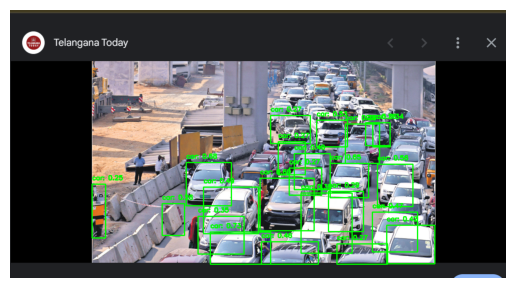

In [ ]:
import os
import cv2
import numpy as np
import firebase_admin
from firebase_admin import credentials, db
from ultralytics import YOLO
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

#  Load YOLO Model
model = YOLO("yolov8n.pt")

#  Firebase Configuration
firebase_json_path = "traffic-management-f3cd5-firebase-adminsdk-fbsvc-7080c55f84.json"
database_url = "https://traffic-management-f3cd5-default-rtdb.firebaseio.com/"

#  Ensure Firebase is Initialized
if not firebase_admin._apps:
    try:
        cred = credentials.Certificate(firebase_json_path)
        firebase_admin.initialize_app(cred, {'databaseURL': database_url})
        print(" Firebase initialized successfully!")
    except Exception as e:
        print(f" Firebase Initialization Failed: {e}")

#  Create Firebase Database Reference
try:
    traffic_ref = db.reference("traffic_data")
    print(" Firebase Database Reference Created Successfully!")
except Exception as e:
    print(f" Error creating database reference: {e}")
    traffic_ref = None

VEHICLE_CLASSES = {2: "car", 3: "motorcycle", 5: "bus", 7: "truck"}

#  Function to count vehicles and lanes using K-Means Clustering
def count_vehicles_and_lanes(image_path):
    results = model(image_path)
    vehicle_count = 0
    vehicle_positions = []

    for result in results:
        for box in result.boxes.data:
            class_id = int(box[5].item())
            if class_id in VEHICLE_CLASSES:
                vehicle_count += 1
                x_position = (box[0].item() + box[2].item()) / 2  # X center of bounding box
                vehicle_positions.append([x_position])

    #  Detect lanes using K-Means Clustering
    lane_count = 1 if vehicle_positions else 0
    if len(vehicle_positions) > 1:
        kmeans = KMeans(n_clusters=min(5, len(vehicle_positions)), random_state=42, n_init=10)
        kmeans.fit(vehicle_positions)
        lane_count = len(set(kmeans.labels_))

    return vehicle_count, lane_count, results

#  Function to update Firebase Realtime Database
def update_firebase(signal_id, vehicle_count, lane_count):
    if traffic_ref is None:
        print("⚠️ Firebase not initialized. Skipping update.")
        return

    try:
        traffic_ref.child(signal_id).update({
            "vehicle_count": vehicle_count,
            "lane_count": lane_count
        })
        print(f"✅ Updated Firebase: Signal={signal_id}, Vehicles={vehicle_count}, Lanes={lane_count}")
    except Exception as e:
        print(f" Firebase Update Failed: {e}")

# User Input: Provide Image Path from System
image_path =r"/content/drive/MyDrive/Screenshot 2025-04-17 141217.png"

#  Verify if the Image Exists
if not os.path.exists(image_path):
    print(f" Error: File '{image_path}' not found!")
else:
    # Get vehicle & lane count
    vehicle_count, lane_count, results = count_vehicles_and_lanes(image_path)
    print(f" Image: {image_path} | 🚗 Vehicles: {vehicle_count} | 🚦 Lanes: {lane_count}")

    # Update Firebase Realtime Database
    update_firebase("signal1", vehicle_count, lane_count)

    # Display image with detections
    img = cv2.imread(image_path)
    for result in results:
        for box in result.boxes.data:
            x1, y1, x2, y2, conf, cls = box.tolist()
            cls = int(cls)
            if cls in VEHICLE_CLASSES:
                label = f"{VEHICLE_CLASSES[cls]}: {conf:.2f}"
                cv2.rectangle(img, (int(x1), int(y1)), (int(x2), int(y2)), (0, 255, 0), 2)
                cv2.putText(img, label, (int(x1), int(y1) - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 255, 0), 2)

    plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
    plt.axis("off")
    plt.show()
